outstanding questions 

- should we be able to interpret the model stripped to it's base? - prob not 
- do we not look at individual QQplots? - we do not
- WHAT AM I TESTING FORRRR LIKE HELP ME SOMEONE

# Final Project Submission

In [79]:
# Please fill out:
# * Student name: Sabina Bains
# * Student pace: Self Paced
# * Scheduled project review date / time: ??????
# * Instructor name: Claude Fried

Business Problem:

King County Healing Association (KCHA) has reached out to you to help get previously incarcerated individuals get back on their feet.

KCHA is an established nonprofit organization that has a variety of successful initiatives such as rehabilitation centers, medical assistance, career services, and temporary housing for those re-entering their communities. The organization now wants to expand on their housing opportunities by rolling out a new service to help those who are prepared to transition into a permanent residence.  

KCHA plans to work with aspiring homeowners in their program towards choosing a quality, yet affordable home. From there, KCHA purchases the home and rents it out to the tenant until fully paid off. There are multiple conditions in the contract, including having held a full time job for at least a year, having a household salary that is at least 30% of the house price, and choosing a home in the same zipcode as their parole officer, if applicable.

KCHA doesn't plan to launch this service for another 3 years, however they first need to determine whether their budget can even cover this program. 

KCHA has 5 families in mind to help in their first year, and want to estimate how much they will have to budget towards this program based on family size / quality preference. Ideally, KCHA would allocate 1MM to this program in the first year. 

### Importing Packages and Reading in Data

In [80]:
# importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import statsmodels.stats.stattools as stattools
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings('ignore')
style.use('dark_background')
pd.set_option("display.max_columns", 999)
pd.set_option("display.max_rows", 999)

In [81]:
# importing King County House Sales dataset
df = pd.read_csv('data/kc_house_data.csv')

# Data Cleaning

## Handling N/A's

In [82]:
print('''This data set is comprised of {} rows. \nN/A's:\n{}'''.format(len(df),df.isna().sum()))

This data set is comprised of 21597 rows. 
N/A's:
id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [83]:
## checking waterfront column
print('''Unique values are {} removing waterfront N/A's would remove {} of the overall dataset. We can drop this column from the dataset since we 
are looking at affordable homes, and a waterfront property is not a priority'''
      .format(df.waterfront.unique(), '{:0.1%}'.format(df.waterfront.isna().sum() / len(df))))
## dropping waterfront columns
df.drop('waterfront',axis=1,inplace=True)

Unique values are [nan  0.  1.] removing waterfront N/A's would remove 11.0% of the overall dataset. We can drop this column from the dataset since we 
are looking at affordable homes, and a waterfront property is not a priority


In [84]:
## dropping views column
df.drop('view',axis=1,inplace=True)

In [85]:
## checking yr_renovated column
print('''removing view N/A's would remove {} of the overall dataset. Let's assume N/A means no renovations.'''
      .format('{:0.1%}'.format(df.yr_renovated.isna().sum() / len(df))))
## filling N/A values with 0
df.yr_renovated.fillna(0,inplace=True)

removing view N/A's would remove 17.8% of the overall dataset. Let's assume N/A means no renovations.


In [86]:
## Filtering out rows with price > 1MM , as KCHA will not purchase above that price
df = df.loc[df.price < 1000000]

## Handling Data Types

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20107 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20107 non-null  int64  
 1   date           20107 non-null  object 
 2   price          20107 non-null  float64
 3   bedrooms       20107 non-null  int64  
 4   bathrooms      20107 non-null  float64
 5   sqft_living    20107 non-null  int64  
 6   sqft_lot       20107 non-null  int64  
 7   floors         20107 non-null  float64
 8   condition      20107 non-null  int64  
 9   grade          20107 non-null  int64  
 10  sqft_above     20107 non-null  int64  
 11  sqft_basement  20107 non-null  object 
 12  yr_built       20107 non-null  int64  
 13  yr_renovated   20107 non-null  float64
 14  zipcode        20107 non-null  int64  
 15  lat            20107 non-null  float64
 16  long           20107 non-null  float64
 17  sqft_living15  20107 non-null  int64  
 18  sqft_l

In [88]:
# looking into why sqft_basement is object type
df.sqft_basement.unique()[:6]

array(['0.0', '400.0', '910.0', '?', '730.0', '1700.0'], dtype=object)

In [89]:
## some rows have a "?" value. need to remove
df = df.loc[~(df.sqft_basement == '?')]

In [90]:
# changing ID and Zip columns to str type
for col in ['id', 'zipcode']:
    df[col] = df[col].astype(str)

In [91]:
# changing columns to int type
for col in ['id', 'price', 'bedrooms', 'sqft_living',
       'sqft_lot', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15']:
    df[col] = df[col].astype(float).astype(int)

In [92]:
df.info()
# data looks ready

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19683 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19683 non-null  int64  
 1   date           19683 non-null  object 
 2   price          19683 non-null  int64  
 3   bedrooms       19683 non-null  int64  
 4   bathrooms      19683 non-null  float64
 5   sqft_living    19683 non-null  int64  
 6   sqft_lot       19683 non-null  int64  
 7   floors         19683 non-null  float64
 8   condition      19683 non-null  int64  
 9   grade          19683 non-null  int64  
 10  sqft_above     19683 non-null  int64  
 11  sqft_basement  19683 non-null  int64  
 12  yr_built       19683 non-null  int64  
 13  yr_renovated   19683 non-null  int64  
 14  zipcode        19683 non-null  object 
 15  lat            19683 non-null  float64
 16  long           19683 non-null  float64
 17  sqft_living15  19683 non-null  int64  
 18  sqft_l

In [93]:
#SPLITTING INTO CONTINOUS AND DISCRETE VARIABLES so we can check linearity of continuous, and turn categorical into dummy variables.
# Also removing renovating detail columns and latitude / longitude since we are not interested in those features.
cont = df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated']]
cat = df[['zipcode']]

## CHECKING LINEARITY OF FEATURES

In [94]:
# removing outlier with 33 bedrooms
cont = cont.loc[~(cont.bedrooms == 33)]

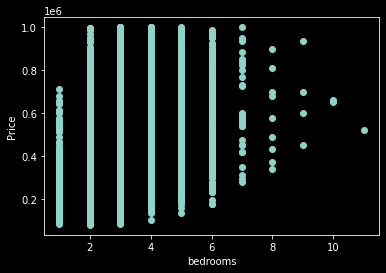

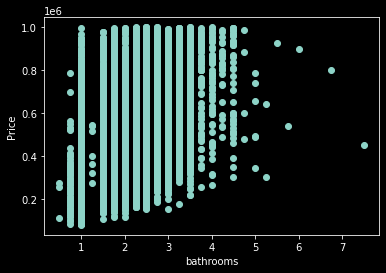

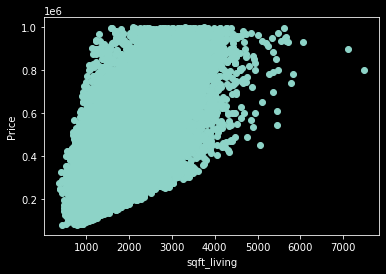

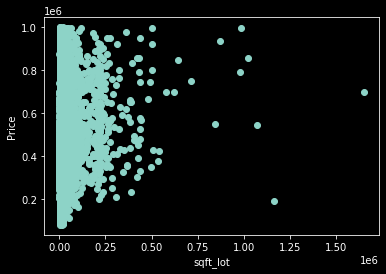

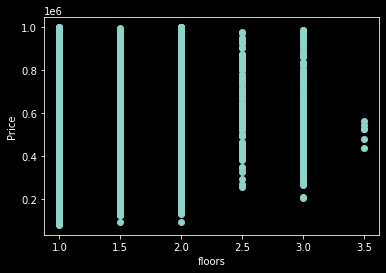

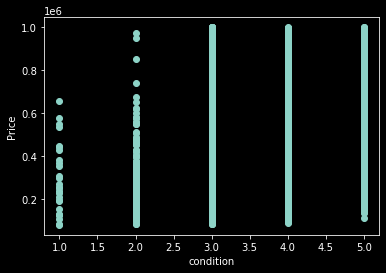

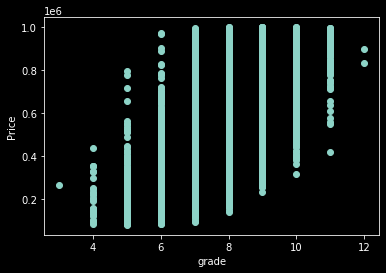

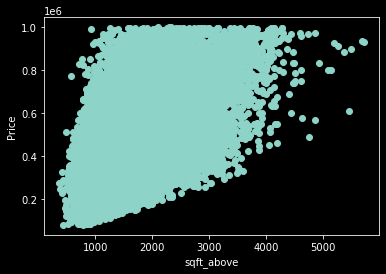

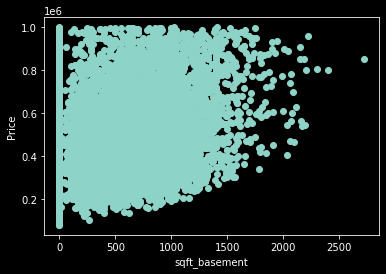

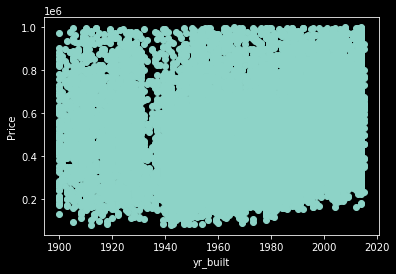

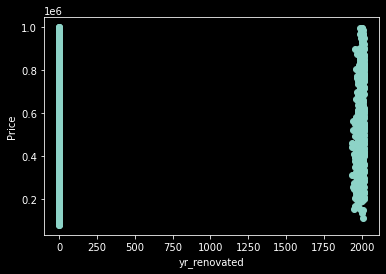


----------- NOTES: ------------
sqft_lot does not have a linear relationship with price, drop sqft_lot
sqft_basement seems off, drop and transform to categorical variable (has basement, does not have basement)
yr_built is does not have linear relationship with price, drop yr_built
yr_renovated does not have linear relationship with price, drop and transform to categorical variable (renovated, not renovated)
we can use grade to determine quality rather than condition since it has a better linear relationship with price, and drop condition column



In [95]:
## Checking Linearity of Features to Dependent variable
for col in cont.drop('price',axis=1).columns:
    plt.scatter(cont[col],cont['price'])
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()
    
print('''
----------- NOTES: ------------
sqft_lot does not have a linear relationship with price, drop sqft_lot
sqft_basement seems off, drop and transform to categorical variable (has basement, does not have basement)
yr_built is does not have linear relationship with price, drop yr_built
yr_renovated does not have linear relationship with price, drop and transform to categorical variable (renovated, not renovated)
we can use grade to determine quality rather than condition since it has a better linear relationship with price, and drop condition column
''')

In [96]:
## creating function to turn values > 0 to 1, and values = 0 to 0.
def make_binary(row):
    if row > 0:
        return 1
    if row == 0:
        return 0
    

## modifying sqft_basement and yr_renovated to be binary variables
## adding new dummy vars into x_cat
cat['has_basement'] = cont['sqft_basement'].apply(make_binary)
cat['renovated'] = cont['yr_renovated'].apply(make_binary)
cat = cat.loc[cat.renovated.isin([0,1])]

In [97]:
## dropping vars that do not have a linear relationship
cont.drop(['sqft_lot','sqft_basement','yr_renovated','yr_built','condition','floors'],axis=1,inplace=True)

In [98]:
## Checking Normality of Variables (not an assumption, but just for reference)
## Variables seem slightly skewed

# for col in cont.columns:
#     cont.hist(col,bins='auto')

## CHECKING FOR MULTICOLLINEARITY

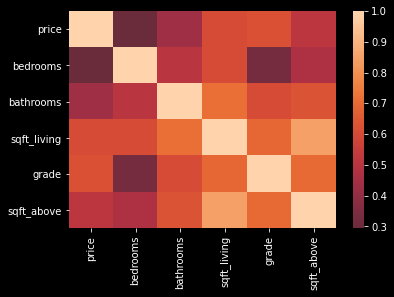

In [99]:
# overall view of correlation. sqft_living and sqft_above highly correlated which makes sense. 
sns.heatmap(cont.corr(), center=0);

In [106]:
# Viewing Correlation Between Each Variable ad Checking which variables have a correlation > 0.70 as this could suggest multicollinearity
cont_corr = cont.corr().abs().stack().reset_index()
cont_corr['preds'] = cont_corr['level_0']+' & '+cont_corr['level_1']
cont_corr = cont_corr.drop(['level_0','level_1'],axis = 1).rename(columns={0:'corr'}).sort_values(by='corr',ascending = False)
cont_corr.loc[(cont_corr['corr'] > 0.70) & (cont_corr['corr'] != 1)]

,corr,preds


In [101]:
## Looks like sqft_living and sqft_above is what is correlating with each predictor. Lets drop them.
cont.drop(['sqft_above','sqft_living'],axis=1,inplace=True)

# Running our Model

In [102]:
# First running models with just continuous variables, and checking QQ plots and heteroscedasticity

In [103]:
# #Running plot & giving it a title
# stats.probplot(model.resid, dist="norm", plot= plt)
# plt.title("Model1 Residuals Q-Q Plot")


--------- NOTES: ----------
    Values don't seem Heteroscedastic



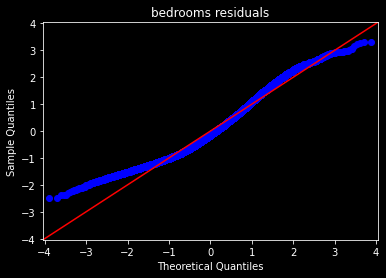

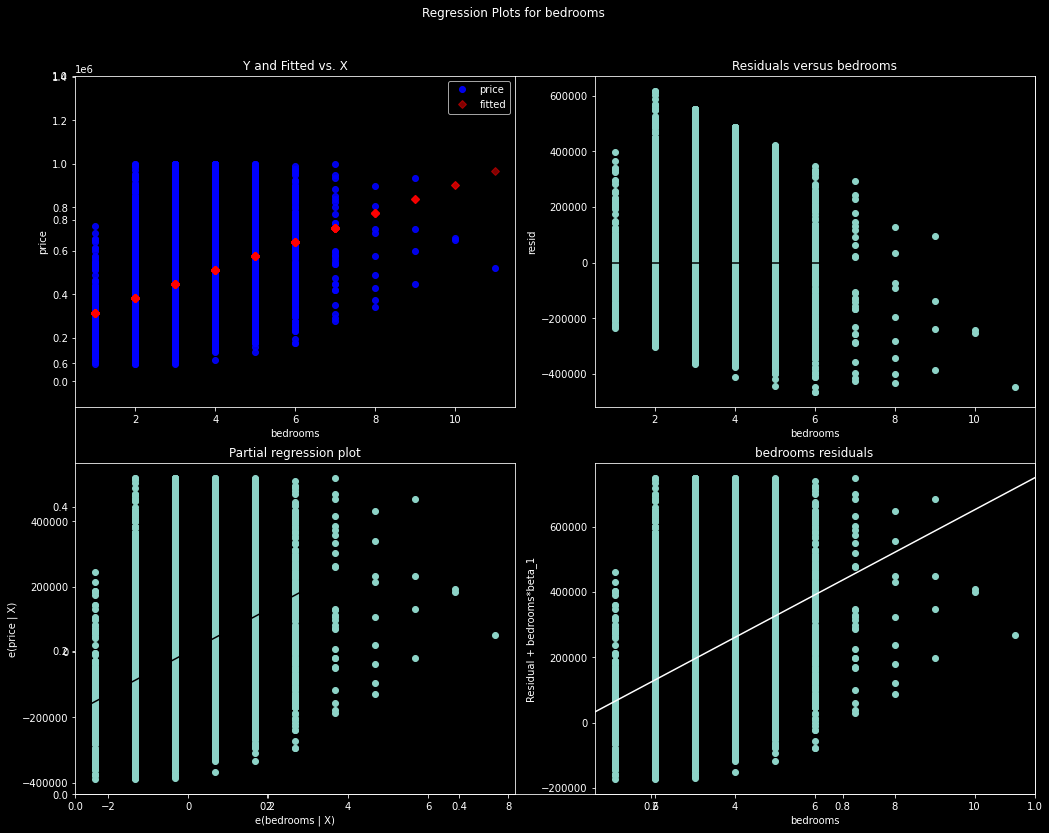

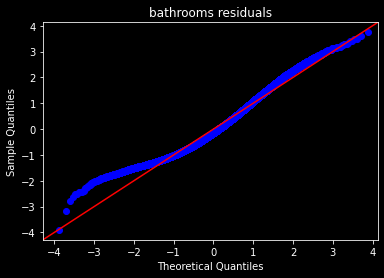

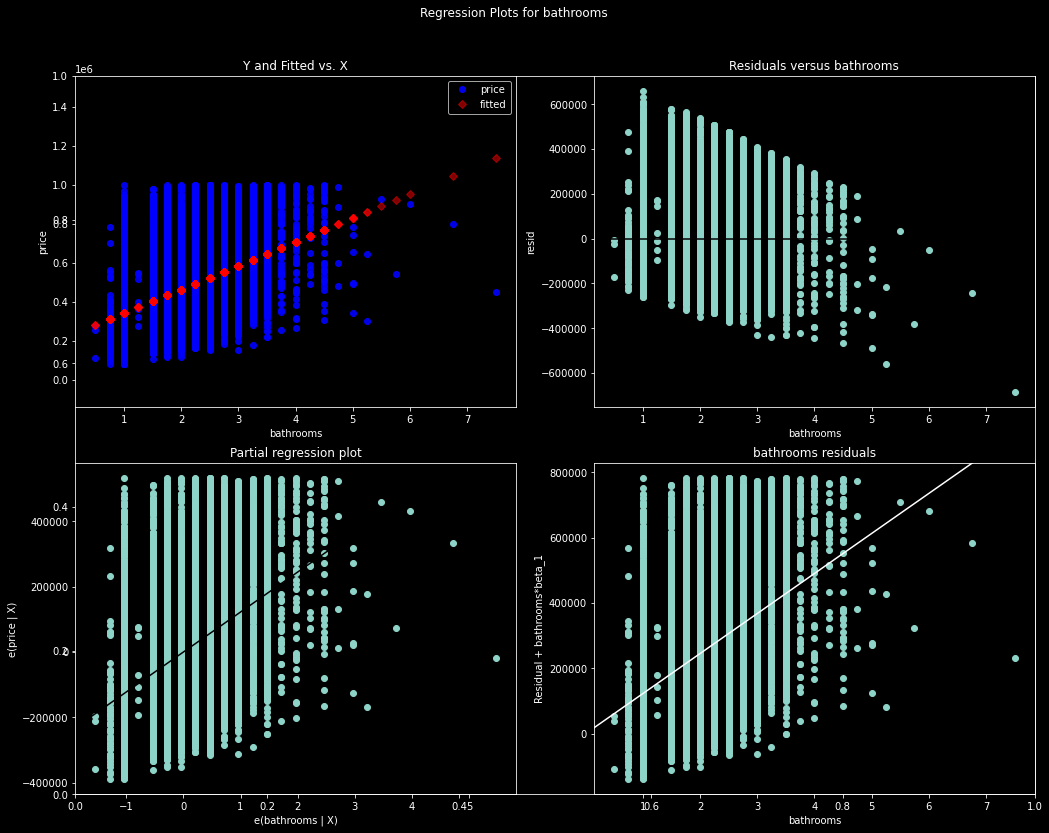

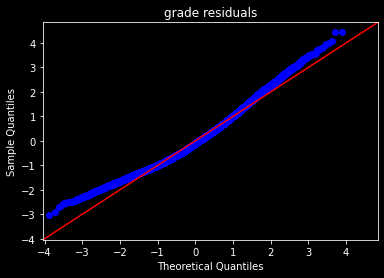

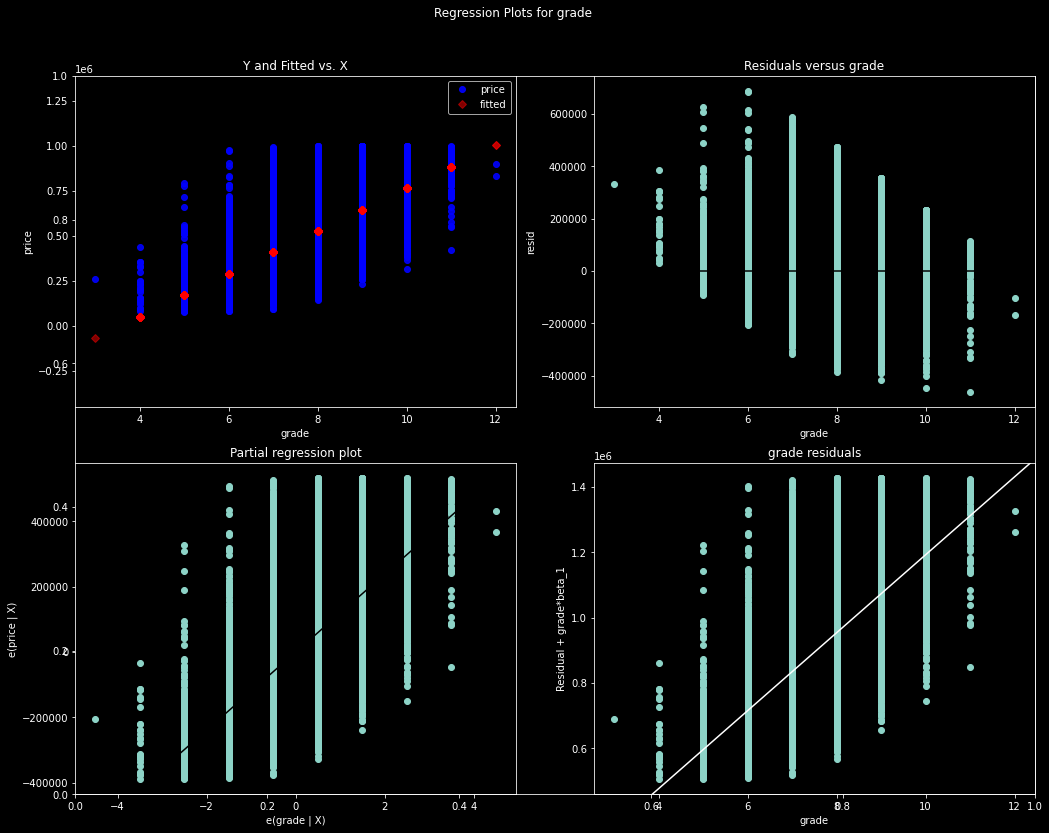

In [107]:
for col in cont.drop('price',axis=1):
    f = 'price ~ '+col
    model = smf.ols(formula=f, data=cont).fit()
    resid = model.resid
    fig = sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True)
    plt.title(col+' residuals')
    fig, axes = plt.subplots(figsize=(15,12))
    fig = sm.graphics.plot_regress_exog(model, col, fig=fig)
    plt.title(col+' residuals')
    
print('''
--------- NOTES: ----------
    Values don't seem Heteroscedastic
''')

In [26]:
## these all seem relatively normally distributed

## ENCODING CATEGORICAL VARIABLES

In [28]:
# checking out how many unique values are in each cat value
for col in cat.columns:
    print(col, len(cat[col].unique()))

zipcode 70
has_basement 2
renovated 2


In [29]:
cat_dummies_list = []
for idx, col in enumerate(cat.columns):
    cat_dummies_list.append(pd.get_dummies(cat[col], prefix=col, drop_first=True)) # drop to avoid dummy trap, 
    
cat_dummies = pd.concat(cat_dummies_list, axis=1)

In [33]:
#Creating Final Dataset

In [34]:
X = pd.concat([cat_dummies,cont.drop('price',axis=1)], axis = 1)
y = cont['price']

#### Running the model

In [35]:
predictors_int = sm.add_constant(X)
model = sm.OLS(y,predictors_int).fit()
model.summary() # Rs of 0.733, Fstat 726.0

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     726.9
Date:                Thu, 13 Jan 2022   Prob (F-statistic):               0.00
Time:                        19:37:58   Log-Likelihood:            -2.5474e+05
No. Observations:               19682   AIC:                         5.096e+05
Df Residuals:                   19607   BIC:                         5.102e+05
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.607e+05   8283.518    -55.615      0.000   -4.77e+05   -4.44e+05
zipcode_98002     9549.8554   9007.893      1.060      0.289   -8106.380    2.72e+04
zipcode_98003    -7343.8121   8169.138     -0.899      0.369   -2.34e+04    8668.392
zipcode_98004     4.981e+05   1.03e+04     48.262      0.000    4.78e+05    5.18e+05
zipcode_98005     3.507e+05   1.01e+04     34.804      0.000    3.31e+05     3.7e+05
zipcode_98006     2.881e+05   7566.410     38.070      0.000    2.73e+05    3.03e+05
zipcode_98007     2.474e+05   1.03e+04     23.906      0.000    2.27e+05    2.68e+05
zipcode_98008     2.458e+05   8291.339     29.640      0.000    2.29e+05    2.62e+05
zipcode_98010     1.336e+05   1.16e+04     11.549      0.000    1.11e+05    1.56e+05
zipcode_98011     1.547e+05   9107.949     16.982      0.000    1.37e+05    1.73e+05
zipcode_98014     1.603e+05   1.07e+04     14.918      0.000    1.39e+05    1.81e+05
zipcode_98019     1.188e+05   9168.210     12.957      0.000    1.01e+05    1.37e+05
zipcode_98022     5.412e+04   8610.749      6.286      0.000    3.72e+04     7.1e+04
zipcode_98023    -2.523e+04   7089.344     -3.559      0.000   -3.91e+04   -1.13e+04
zipcode_98024     2.005e+05   1.31e+04     15.309      0.000    1.75e+05    2.26e+05
zipcode_98027     2.088e+05   7537.416     27.699      0.000    1.94e+05    2.24e+05
zipcode_98028     1.409e+05   8169.528     17.244      0.000    1.25e+05    1.57e+05
zipcode_98029     2.067e+05   8025.293     25.752      0.000    1.91e+05    2.22e+05
zipcode_98030    -1845.8563   8373.305     -0.220      0.826   -1.83e+04    1.46e+04
zipcode_98031     6476.1355   8233.487      0.787      0.432   -9662.198    2.26e+04
zipcode_98032     -1.03e+04   1.06e+04     -0.970      0.332   -3.11e+04    1.05e+04
zipcode_98033     3.172e+05   7715.211     41.119      0.000    3.02e+05    3.32e+05
zipcode_98034     1.757e+05   7010.727     25.068      0.000    1.62e+05    1.89e+05
zipcode_98038     4.906e+04   6875.928      7.135      0.000    3.56e+04    6.25e+04
zipcode_98039     6.364e+05   4.56e+04     13.949      0.000    5.47e+05    7.26e+05
zipcode_98040     4.367e+05   1.01e+04     43.326      0.000    4.17e+05    4.56e+05
zipcode_98042     1.747e+04   6929.463      2.521      0.012    3886.172    3.11e+04
zipcode_98045     1.204e+05   8832.204     13.630      0.000    1.03e+05    1.38e+05
zipcode_98052      2.58e+05   6962.267     37.057      0.000    2.44e+05    2.72e+05
zipcode_98053     2.753e+05   7600.141     36.228      0.000     2.6e+05     2.9e+05
zipcode_98055     4.122e+04   8270.857      4.984      0.000     2.5e+04    5.74e+04
zipcode_98056     1.203e+05   7409.375     16.241      0.000    1.06e+05    1.35e+05
zipcode_98058     4.044e+04   7241.009      5.585      0.000    2.62e+04    5.46e+04
zipcode_98059     1.217

In [36]:
cont

,price,bedrooms,bathrooms,grade
0,221900,3,1.00,7
1,538000,3,2.25,7
2,180000,2,1.00,6
3,604000,4,3.00,7
4,510000,3,2.00,8
...,...,...,...,...
21592,360000,3,2.50,8
21593,400000,4,2.50,8
21594,402101,2,0.75,7
21595,400000,3,2.50,8


In [37]:
# from statsmodels.stats.diagnostic import het_breuschpagan
# from statsmodels.stats.diagnostic import het_white

# white_test = het_white(model.resid,  model.model.exog)

# labels = ['‘LM Statistic’', '‘LM-Test p-value’', '‘F-Statistic’', '‘F-Test p-value’']
# print(dict(zip(labels, white_test)))

In [38]:
## Dropping zips with high P-value's

predictors_int = sm.add_constant(X.drop(['zipcode_98002','zipcode_98003','zipcode_98030','zipcode_98032','zipcode_98092'],axis=1))
model = sm.OLS(y,predictors_int).fit() # cov_type='HC3' inceases fstat?
model.summary() # Rs of 0.733, fstat 779.5, increases after dropping high P-values 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     779.5
Date:                Thu, 13 Jan 2022   Prob (F-statistic):               0.00
Time:                        19:37:59   Log-Likelihood:            -2.5474e+05
No. Observations:               19682   AIC:                         5.096e+05
Df Residuals:                   19612   BIC:                         5.102e+05
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.611e+05   6837.621    -67.437      0.000   -4.75e+05   -4.48e+05
zipcode_98004     4.993e+05   9169.838     54.450      0.000    4.81e+05    5.17e+05
zipcode_98005     3.519e+05   8889.859     39.587      0.000    3.34e+05    3.69e+05
zipcode_98006     2.893e+05   5892.721     49.089      0.000    2.78e+05    3.01e+05
zipcode_98007     2.486e+05   9200.277     27.016      0.000    2.31e+05    2.67e+05
zipcode_98008     2.469e+05   6806.176     36.275      0.000    2.34e+05     2.6e+05
zipcode_98010     1.347e+05   1.06e+04     12.758      0.000    1.14e+05    1.55e+05
zipcode_98011     1.558e+05   7778.644     20.030      0.000    1.41e+05    1.71e+05
zipcode_98014     1.614e+05   9645.934     16.728      0.000    1.42e+05     1.8e+05
zipcode_98019     1.199e+05   7851.813     15.265      0.000    1.04e+05    1.35e+05
zipcode_98022     5.519e+04   7194.927      7.670      0.000    4.11e+04    6.93e+04
zipcode_98023    -2.409e+04   5275.339     -4.566      0.000   -3.44e+04   -1.37e+04
zipcode_98024     2.016e+05   1.22e+04     16.507      0.000    1.78e+05    2.26e+05
zipcode_98027     2.099e+05   5858.910     35.834      0.000    1.98e+05    2.21e+05
zipcode_98028      1.42e+05   6656.877     21.332      0.000    1.29e+05    1.55e+05
zipcode_98029     2.078e+05   6472.653     32.104      0.000    1.95e+05     2.2e+05
zipcode_98031     7562.1580   6737.628      1.122      0.262   -5644.166    2.08e+04
zipcode_98033     3.184e+05   6090.286     52.276      0.000    3.06e+05     3.3e+05
zipcode_98034     1.769e+05   5171.755     34.198      0.000    1.67e+05    1.87e+05
zipcode_98038     5.011e+04   4986.851     10.049      0.000    4.03e+04    5.99e+04
zipcode_98039     6.376e+05   4.54e+04     14.050      0.000    5.49e+05    7.27e+05
zipcode_98040     4.379e+05   8892.596     49.244      0.000     4.2e+05    4.55e+05
zipcode_98042     1.854e+04   5061.397      3.664      0.000    8622.550    2.85e+04
zipcode_98045     1.215e+05   7455.537     16.294      0.000    1.07e+05    1.36e+05
zipcode_98052     2.592e+05   5096.927     50.848      0.000    2.49e+05    2.69e+05
zipcode_98053     2.765e+05   5939.512     46.544      0.000    2.65e+05    2.88e+05
zipcode_98055     4.231e+04   6784.794      6.235      0.000     2.9e+04    5.56e+04
zipcode_98056     1.214e+05   5701.498     21.297      0.000     1.1e+05    1.33e+05
zipcode_98058     4.156e+04   5478.191      7.586      0.000    3.08e+04    5.23e+04
zipcode_98059     1.228e+05   5520.834     22.239      0.000    1.12e+05    1.34e+05
zipcode_98065     1.755e+05   6477.331     27.092      0.000    1.63e+05    1.88e+05
zipcode_98070     2.151e+05   9848.222     21.841      0.000    1.96e+05    2.34e+05
zipcode_98072      1.97e+05   6879.825     28.638      0.000    1.84e+05    2.11e+05
zipcode_98074      2.34

In [39]:
df.groupby(by='zipcode').mean()['price'].sort_values(ascending=False).head()

zipcode
98039    881000.000000
98040    813701.860140
98004    802391.766917
98005    727263.419580
98075    719143.003268
Name: price, dtype: float64

In [40]:
cont.price.mean()

467137.4001625851

In [41]:
model.params.sort_values(ascending=False).head()
# model.params

zipcode_98039    637576.622448
zipcode_98004    499294.403601
zipcode_98040    437907.316171
zipcode_98112    381970.678269
zipcode_98109    376893.149440
dtype: float64

In [42]:
stattools.durbin_watson(model.resid) # close to 2. so thats...good?

1.9784872573358623

In [43]:
## since these are all relatively normally distributed but not?

# x_cont = cont.drop('price',axis=1)


def log(col):
    return np.log(col)

cont_log = cont.apply(log)

final_preds = pd.concat([cat_dummies,cont.drop('price',axis=1)],axis=1)

predictors_int = sm.add_constant(final_preds)
model = sm.OLS(np.log(cont['price']),predictors_int).fit()
model.summary() 

## Values when tranforming -- Although the JB test decreases, the P-value is still < 0.05, rejecting the null hypothesis that the residuals are normal
# bedrooms [('Jarque-Bera', 345.1221344705031), ('Prob', 1.14203840389945e-75), ('Skew', -0.22580178435744447), ('Kurtosis', 2.534283240112985)]
# bathrooms [('Jarque-Bera', 247.67835739508286), ('Prob', 1.6494078160631498e-54), ('Skew', -0.11772372499244498), ('Kurtosis', 2.503431190150687)]
# grade [('Jarque-Bera', 48.35325364172509), ('Prob', 3.163911890681801e-11), ('Skew', -0.09811411253447358), ('Kurtosis', 2.8569759664777568)]

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     809.2
Date:                Thu, 13 Jan 2022   Prob (F-statistic):               0.00
Time:                        19:37:59   Log-Likelihood:                 2293.9
No. Observations:               19682   AIC:                            -4438.
Df Residuals:                   19607   BIC:                            -3846.
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               10.8982      0.018    617.577      0.000      10.864      10.933
zipcode_98002       -0.0343      0.019     -1.786      0.074      -0.072       0.003
zipcode_98003        0.0008      0.017      0.045      0.964      -0.033       0.035
zipcode_98004        1.0391      0.022     47.256      0.000       0.996       1.082
zipcode_98005        0.7717      0.021     35.947      0.000       0.730       0.814
zipcode_98006        0.6595      0.016     40.916      0.000       0.628       0.691
zipcode_98007        0.6259      0.022     28.390      0.000       0.583       0.669
zipcode_98008        0.6396      0.018     36.208      0.000       0.605       0.674
zipcode_98010        0.3401      0.025     13.797      0.000       0.292       0.388
zipcode_98011        0.4602      0.019     23.718      0.000       0.422       0.498
zipcode_98014        0.4048      0.023     17.687      0.000       0.360       0.450
zipcode_98019        0.3665      0.020     18.766      0.000       0.328       0.405
zipcode_98022        0.1523      0.018      8.305      0.000       0.116       0.188
zipcode_98023       -0.0494      0.015     -3.271      0.001      -0.079      -0.020
zipcode_98024        0.5153      0.028     18.467      0.000       0.461       0.570
zipcode_98027        0.5322      0.016     33.147      0.000       0.501       0.564
zipcode_98028        0.4226      0.017     24.284      0.000       0.389       0.457
zipcode_98029        0.5481      0.017     32.057      0.000       0.515       0.582
zipcode_98030        0.0347      0.018      1.944      0.052      -0.000       0.070
zipcode_98031        0.0588      0.018      3.354      0.001       0.024       0.093
zipcode_98032       -0.0534      0.023     -2.359      0.018      -0.098      -0.009
zipcode_98033        0.7515      0.016     45.721      0.000       0.719       0.784
zipcode_98034        0.4963      0.015     33.230      0.000       0.467       0.526
zipcode_98038        0.1879      0.015     12.830      0.000       0.159       0.217
zipcode_98039        1.2812      0.097     13.181      0.000       1.091       1.472
zipcode_98040        0.8943      0.021     41.648      0.000       0.852       0.936
zipcode_98042        0.0757      0.015      5.128      0.000       0.047       0.105
zipcode_98045        0.3561      0.019     18.926      0.000       0.319       0.393
zipcode_98052        0.6333      0.015     42.695      0.000       0.604       0.662
zipcode_98053        0.6654      0.016     41.095      0.000       0.634       0.697
zipcode_98055        0.1227      0.018      6.965      0.000       0.088       0.157
zipcode_98056        0.3378      0.016     21.401      0.000       0.307       0.369
zipcode_98058        0.1613      0.015     10.456      0.000       0.131       0.192
zipcode_98059        0.

In [44]:
stattools.durbin_watson(model.resid) ### better result but not by too much? look up what this means. 

## Given the statistical value of 2.09, the test provides evidence that there is no serial correlation present meaning the residual error terms are uncorrelated and are independent.

1.993958046782784

## train test

In [45]:
# predictors_int = sm.add_constant(cont.drop('price',axis=1))
# model = sm.OLS(y,predictors_int).fit()
# model.summary() # 0.392 when continuous oNLY 


predictors_int = sm.add_constant(cat_dummies)
model = sm.OLS(y,predictors_int).fit()
model.summary() # 0.392 when continuous oNLY 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     275.8
Date:                Thu, 13 Jan 2022   Prob (F-statistic):               0.00
Time:                        19:37:59   Log-Likelihood:            -2.6091e+05
No. Observations:               19682   AIC:                         5.220e+05
Df Residuals:                   19610   BIC:                         5.225e+05
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.708e+05   7396.159     36.619      0.000    2.56e+05    2.85e+05
zipcode_98002    -4.437e+04   1.23e+04     -3.605      0.000   -6.85e+04   -2.02e+04
zipcode_98003     8746.7507   1.12e+04      0.783      0.434   -1.32e+04    3.06e+04
zipcode_98004       5.1e+05   1.41e+04     36.149      0.000    4.82e+05    5.38e+05
zipcode_98005     4.331e+05   1.38e+04     31.494      0.000    4.06e+05     4.6e+05
zipcode_98006     3.785e+05   1.03e+04     36.770      0.000    3.58e+05    3.99e+05
zipcode_98007     3.044e+05   1.41e+04     21.527      0.000    2.77e+05    3.32e+05
zipcode_98008     2.663e+05   1.13e+04     23.489      0.000    2.44e+05    2.88e+05
zipcode_98010     1.368e+05   1.58e+04      8.642      0.000    1.06e+05    1.68e+05
zipcode_98011     1.998e+05   1.25e+04     16.044      0.000    1.75e+05    2.24e+05
zipcode_98014     1.496e+05   1.47e+04     10.181      0.000    1.21e+05    1.78e+05
zipcode_98019     1.426e+05   1.25e+04     11.374      0.000    1.18e+05    1.67e+05
zipcode_98022     3.705e+04   1.18e+04      3.145      0.002     1.4e+04    6.01e+04
zipcode_98023    -5891.3879   9694.728     -0.608      0.543   -2.49e+04    1.31e+04
zipcode_98024     1.947e+05   1.79e+04     10.864      0.000     1.6e+05     2.3e+05
zipcode_98027     2.769e+05   1.03e+04     26.934      0.000    2.57e+05    2.97e+05
zipcode_98028     1.642e+05   1.12e+04     14.693      0.000    1.42e+05    1.86e+05
zipcode_98029     3.042e+05   1.09e+04     27.865      0.000    2.83e+05    3.26e+05
zipcode_98030     1.308e+04   1.15e+04      1.142      0.254   -9377.616    3.55e+04
zipcode_98031     1.672e+04   1.13e+04      1.484      0.138   -5362.913    3.88e+04
zipcode_98032    -3.717e+04   1.45e+04     -2.561      0.010   -6.56e+04   -8721.057
zipcode_98033     3.407e+05   1.06e+04     32.291      0.000     3.2e+05    3.61e+05
zipcode_98034     1.811e+05   9593.189     18.882      0.000    1.62e+05       2e+05
zipcode_98038     8.562e+04   9388.337      9.120      0.000    6.72e+04    1.04e+05
zipcode_98039     6.018e+05   6.24e+04      9.642      0.000    4.79e+05    7.24e+05
zipcode_98040     5.193e+05   1.38e+04     37.764      0.000    4.92e+05    5.46e+05
zipcode_98042     3.187e+04   9480.267      3.362      0.001    1.33e+04    5.05e+04
zipcode_98045     1.396e+05   1.21e+04     11.560      0.000    1.16e+05    1.63e+05
zipcode_98052     3.351e+05   9485.797     35.328      0.000    3.17e+05    3.54e+05
zipcode_98053     3.458e+05   1.03e+04     33.426      0.000    3.26e+05    3.66e+05
zipcode_98055     2.004e+04   1.13e+04      1.771      0.077   -2142.786    4.22e+04
zipcode_98056     1.228e+05   1.01e+04     12.110      0.000    1.03e+05    1.43e+05
zipcode_98058     6.235e+04   9904.784      6.295      0.000    4.29e+04    8.18e+04
zipcode_98059     1.701

## Model Validation

In [46]:
# Performing a train-test-split to assess performance, and whether the model is over or underfitting the data.
# randomly split the data, 67% train 33% test. 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [47]:
# apply regression to training X and y data, use to predict X train and X test. 
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [48]:
#looking at Mean Squared Error of train and test
from sklearn.metrics import mean_squared_error

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', '{:,.0f}'.format(mse_train))
print('Test Mean Squarred Error:', '{:,.0f}'.format(mse_test))

Train Mean Squarred Error: 10,213,008,511
Test Mean Squarred Error: 10,300,452,391


In [49]:
## difference can change depending on teh randomly chosen sample, so lets do cross validation with 10 folds

In [50]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results  = np.mean(cross_val_score(linreg, X, y, cv=5))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20))

In [51]:
cv_5_results, cv_10_results, cv_20_results

(0.7242546795176771, 0.7227132737550788, 0.7257373952945747)

# MAKING PREDICTIONS

In [53]:
def hhold_details(zipcode,basement,renovated,bedrooms,bathrooms,grade):
    pred_list = [0] * 69
    
    if zipcode == 98001:
        pass
    else:
        zipcode = 'zipcode_'+str(zipcode)
        zip_idx = X.columns.get_loc(zipcode)
        pred_list[zip_idx] = 1
        
    pred_list.append(basement)
    pred_list.append(renovated)
    pred_list.append(bedrooms)
    pred_list.append(bathrooms)
    pred_list.append(grade)
    return pred_list

In [120]:
df.zipcode.unique()

array(['98178', '98125', '98028', '98136', '98074', '98198', '98146',
       '98038', '98007', '98115', '98107', '98126', '98019', '98103',
       '98003', '98133', '98092', '98030', '98002', '98119', '98112',
       '98052', '98027', '98117', '98058', '98001', '98056', '98166',
       '98023', '98148', '98105', '98042', '98008', '98059', '98122',
       '98144', '98004', '98034', '98075', '98116', '98118', '98040',
       '98032', '98045', '98102', '98077', '98108', '98168', '98177',
       '98065', '98029', '98006', '98109', '98022', '98033', '98155',
       '98024', '98011', '98053', '98031', '98010', '98106', '98070',
       '98199', '98072', '98188', '98005', '98014', '98055', '98039'],
      dtype=object)

In [128]:
import pandas
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X, y)

fam1 = hhold_details(zipcode = 98011, basement = 1, renovated = 0, bedrooms = 3, bathrooms = 2, grade = 6)
fam2 = hhold_details(zipcode = 98052, basement = 0, renovated = 0, bedrooms = 1, bathrooms = 1, grade = 4)
fam3 = hhold_details(zipcode = 98105, basement = 0, renovated = 1, bedrooms = 2, bathrooms = 1, grade = 6)
fam4 = hhold_details(zipcode = 98168, basement = 1, renovated = 0, bedrooms = 4, bathrooms = 2, grade = 9)
fam5 = hhold_details(zipcode = 98199, basement = 0, renovated = 0, bedrooms = 2, bathrooms = 2, grade = 7)

overall_spend = []
for fam in [fam1,fam2,fam3,fam4,fam5]:
    pred_fam = regr.predict([fam])
    overall_spend.append(pred_fam[0])
    print('The predicted cost of this home would be '+'{:,.0f}'.format(pred_fam[0])+', requiring a down payment of at least '+'{:,.0f}'.format(pred_fam[0]*.30))
print('total budget required: '+'{:,.0f}'.format(sum(overall_spend)))

The predicted cost of this home would be 330,721, requiring a down payment of at least 99,216
The predicted cost of this home would be 175,478, requiring a down payment of at least 52,643
The predicted cost of this home would be 508,098, requiring a down payment of at least 152,429
The predicted cost of this home would be 492,671, requiring a down payment of at least 147,801
The predicted cost of this home would be 548,205, requiring a down payment of at least 164,461
total budget required: 2,055,172


In [ ]:
# - new idea , contract to support the down payment only 